In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [49]:
df = pd.read_csv('C:/Users/yfeng/Desktop/cps/Sep_17_new_Q1_low_wage_report/All_obs_10counties_presitige.csv')

In [50]:
df = df.loc[df['YEAR']!= 2018]

In [51]:
df = df.loc[(df['AGE']>=18) & (df['AGE']<=60 )]

In [52]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,HFLAG,ASECWTH,...,PAIDGH,EMCONTRB,JTOCC,HOURWAGE,EARNWEEK,UHRSWORKORG,WKSWORKORG,OCC2010_y,PRESGL,PRENT
0,0,4360,2010,2611,1,2633.6673,20091206245800,NaN,NaN,NaN,...,NaN,NaN,0.0,99.99,9999.99,999.0,0.0,6440.0,40.6,44.6
1,1,4361,2010,2611,1,2633.6673,20091206245800,NaN,NaN,NaN,...,NaN,NaN,0.0,99.99,9999.99,999.0,0.0,5700.0,44.5,46.1
4,4,4364,2010,2612,1,2633.6673,20091203069900,NaN,NaN,NaN,...,NaN,NaN,0.0,99.99,9999.99,999.0,0.0,NaN,NaN,NaN
5,5,4365,2010,2612,1,2633.6673,20091203069900,NaN,NaN,NaN,...,NaN,NaN,0.0,99.99,9999.99,999.0,0.0,5000.0,50.3,50.7
6,6,4366,2010,2613,1,3683.7540,20091200281200,NaN,NaN,NaN,...,NaN,NaN,0.0,20.70,769.23,999.0,52.0,NaN,NaN,NaN


In [53]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'YEAR', 'SERIAL', 'MONTH', 'HWTFINL',
       'CPSID', 'ASECFLAG', 'HFLAG', 'ASECWTH', 'STATEFIP', 'COUNTY', 'PERNUM',
       'WTFINL', 'CPSIDP', 'ASECWT', 'AGE', 'SEX', 'RACE', 'MARST', 'EMPSTAT',
       'OCC', 'OCC2010_x', 'IND', 'CLASSWKR', 'UHRSWORKT', 'EDUC', 'EDUC99',
       'EDDIPGED', 'OCCLY', 'INDLY', 'OCC90LY', 'IND90LY', 'OCC10LY',
       'CLASSWLY', 'WORKLY', 'WKSWORK1', 'UHRSWORKLY', 'WKSUNEM1', 'WKXPNS',
       'INCTOT', 'INCWAGE', 'PAIDGH', 'EMCONTRB', 'JTOCC', 'HOURWAGE',
       'EARNWEEK', 'UHRSWORKORG', 'WKSWORKORG', 'OCC2010_y', 'PRESGL',
       'PRENT'],
      dtype='object')

In [54]:
df.loc[df['EARNWEEK'].isin([9999.99,0])] = np.nan
df = df.loc[~df['UHRSWORKT'].isin([997,999,0])]

df = df.loc[df['UHRSWORKT'].notnull()]
df = df.loc[df['PRESGL'] != 0]
df = df.loc[df['PRESGL'].notnull()]

In [55]:
df['Average_Weekly_Hours_Compareed_to_40'] = abs(df['UHRSWORKT'] - 40)

df1 = df.loc[df['UHRSWORKT'] > 40]
df2 = df.loc[df['UHRSWORKT'] <= 40]
df3 = df.loc[df['UHRSWORKT'].isnull()]

df1['Calcu_Hourly_Wage'] = df1['EARNWEEK']/(1.5*df1['UHRSWORKT']-20)
df2['Calcu_Hourly_Wage'] = df2['EARNWEEK']/df2['UHRSWORKT']
df3['Calcu_Hourly_Wage'] = np.nan
df = pd.concat([df1,df2, df3])

C:\Users\yfeng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\yfeng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
dc1 = df[pd.notna(df['PRESGL'])]
dc1

,Unnamed: 0,Unnamed: 0.1,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,HFLAG,ASECWTH,...,JTOCC,HOURWAGE,EARNWEEK,UHRSWORKORG,WKSWORKORG,OCC2010_y,PRESGL,PRENT,Average_Weekly_Hours_Compareed_to_40,Calcu_Hourly_Wage
76,76.0,4505.0,2010.0,2701.0,1.0,2635.4699,2.009100e+13,NaN,NaN,NaN,...,0.0,9.30,465.00,50.0,0.0,3600.0,36.3,41.7,10.0,8.454545
83,83.0,4512.0,2010.0,2704.0,1.0,3786.7243,2.008101e+13,NaN,NaN,NaN,...,0.0,99.99,2500.00,999.0,52.0,20.0,50.3,56.5,10.0,45.454545
118,118.0,4559.0,2010.0,2731.0,1.0,3561.0132,2.009100e+13,NaN,NaN,NaN,...,0.0,99.99,845.00,999.0,0.0,310.0,50.3,41.0,5.0,17.789474
141,141.0,4637.0,2010.0,2779.0,1.0,3042.7988,2.008101e+13,NaN,NaN,NaN,...,0.0,99.99,1634.61,999.0,52.0,4700.0,50.3,44.2,10.0,29.720182
248,248.0,11999.0,2010.0,6258.0,1.0,3813.9774,2.008101e+13,NaN,NaN,NaN,...,2000.0,38.00,800.00,999.0,0.0,8630.0,26.3,42.9,2.0,18.604651
252,252.0,12003.0,2010.0,6260.0,1.0,3861.3800,2.009100e+13,NaN,NaN,NaN,...,0.0,99.99,2884.61,999.0,52.0,3060.0,81.5,86.1,34.0,31.699011
275,275.0,12035.0,2010.0,6272.0,1.0,2605.6782,2.009100e+13,NaN,NaN,NaN,...,0.0,99.99,692.00,999.0,0.0,4760.0,32.8,33.6,5.0,14.568421
287,287.0,12069.0,2010.0,6289.0,1.0,2659.9043,2.008101e+13,NaN,NaN,NaN,...,0.0,99.99,1538.46,999.0,52.0,2320.0,59.6,66.4,5.0,32.388632
344,344.0,12169.0,2010.0,6333.0,1.0,3819.5067,2.009101e+13,NaN,NaN,NaN,...,0.0,39.00,1462.50,999.0,0.0,3150.0,36.7,56.0,11.0,25.884956
348,348.0,12173.0,2010.0,6334.0,1.0,2695.4905,2.009101e+13,NaN,NaN,NaN,...,0.0,99.99,1153.84,999.0,52.0,230.0,59.6,63.7,20.0,16.483429


In [57]:
dc1['HOURWAGE_origial ']= dc1['HOURWAGE']

In [58]:
dc1.loc[dc1['HOURWAGE'].isin([0, 99.99]), 'HOURWAGE'] = dc1.Calcu_Hourly_Wage

In [59]:
dc1 = dc1.rename(columns = {'HOURWAGE': 'Final1_hourly_wage'})

In [60]:
dc1 = dc1.loc[dc1['PRESGL']!=0]
deflator = pd.read_excel('C:/Users/yfeng/Desktop/cps/Ipums_cps_2000-2018/obs_10_county_2003_2008/deflator_to2017.xlsx')

In [61]:
dc2 = pd.merge(dc1, deflator, on='YEAR', how = 'left')

In [62]:
dc2['Final2_real_dollar_Hourly_wage']=dc2.Final1_hourly_wage*dc2.change_to_2017_Base

In [63]:
dc2

,Unnamed: 0,Unnamed: 0.1,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,HFLAG,ASECWTH,...,UHRSWORKORG,WKSWORKORG,OCC2010_y,PRESGL,PRENT,Average_Weekly_Hours_Compareed_to_40,Calcu_Hourly_Wage,HOURWAGE_origial,change_to_2017_Base,Final2_real_dollar_Hourly_wage
0,76.0,4505.0,2010.0,2701.0,1.0,2635.4699,2.009100e+13,NaN,NaN,NaN,...,50.0,0.0,3600.0,36.3,41.7,10.0,8.454545,9.30,1.12069,10.422417
1,83.0,4512.0,2010.0,2704.0,1.0,3786.7243,2.008101e+13,NaN,NaN,NaN,...,999.0,52.0,20.0,50.3,56.5,10.0,45.454545,99.99,1.12069,50.940455
2,118.0,4559.0,2010.0,2731.0,1.0,3561.0132,2.009100e+13,NaN,NaN,NaN,...,999.0,0.0,310.0,50.3,41.0,5.0,17.789474,99.99,1.12069,19.936485
3,141.0,4637.0,2010.0,2779.0,1.0,3042.7988,2.008101e+13,NaN,NaN,NaN,...,999.0,52.0,4700.0,50.3,44.2,10.0,29.720182,99.99,1.12069,33.307111
4,248.0,11999.0,2010.0,6258.0,1.0,3813.9774,2.008101e+13,NaN,NaN,NaN,...,999.0,0.0,8630.0,26.3,42.9,2.0,18.604651,38.00,1.12069,42.586220
5,252.0,12003.0,2010.0,6260.0,1.0,3861.3800,2.009100e+13,NaN,NaN,NaN,...,999.0,52.0,3060.0,81.5,86.1,34.0,31.699011,99.99,1.12069,35.524765
6,275.0,12035.0,2010.0,6272.0,1.0,2605.6782,2.009100e+13,NaN,NaN,NaN,...,999.0,0.0,4760.0,32.8,33.6,5.0,14.568421,99.99,1.12069,16.326684
7,287.0,12069.0,2010.0,6289.0,1.0,2659.9043,2.008101e+13,NaN,NaN,NaN,...,999.0,52.0,2320.0,59.6,66.4,5.0,32.388632,99.99,1.12069,36.297616
8,344.0,12169.0,2010.0,6333.0,1.0,3819.5067,2.009101e+13,NaN,NaN,NaN,...,999.0,0.0,3150.0,36.7,56.0,11.0,25.884956,39.00,1.12069,43.706910
9,348.0,12173.0,2010.0,6334.0,1.0,2695.4905,2.009101e+13,NaN,NaN,NaN,...,999.0,52.0,230.0,59.6,63.7,20.0,16.483429,99.99,1.12069,18.472814


In [64]:
dc2.shape

(16212, 57)

In [65]:
dc2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'YEAR', 'SERIAL', 'MONTH', 'HWTFINL',
       'CPSID', 'ASECFLAG', 'HFLAG', 'ASECWTH', 'STATEFIP', 'COUNTY', 'PERNUM',
       'WTFINL', 'CPSIDP', 'ASECWT', 'AGE', 'SEX', 'RACE', 'MARST', 'EMPSTAT',
       'OCC', 'OCC2010_x', 'IND', 'CLASSWKR', 'UHRSWORKT', 'EDUC', 'EDUC99',
       'EDDIPGED', 'OCCLY', 'INDLY', 'OCC90LY', 'IND90LY', 'OCC10LY',
       'CLASSWLY', 'WORKLY', 'WKSWORK1', 'UHRSWORKLY', 'WKSUNEM1', 'WKXPNS',
       'INCTOT', 'INCWAGE', 'PAIDGH', 'EMCONTRB', 'JTOCC',
       'Final1_hourly_wage', 'EARNWEEK', 'UHRSWORKORG', 'WKSWORKORG',
       'OCC2010_y', 'PRESGL', 'PRENT', 'Average_Weekly_Hours_Compareed_to_40',
       'Calcu_Hourly_Wage', 'HOURWAGE_origial ', 'change_to_2017_Base',
       'Final2_real_dollar_Hourly_wage'],
      dtype='object')

In [66]:
dc2.loc[:, ['AGE', 'SEX', 'OCC', 'IND', 'RACE', 'EDUC','Final2_real_dollar_Hourly_wage']]

,AGE,SEX,OCC,IND,RACE,EDUC,Final2_real_dollar_Hourly_wage
0,34.0,2.0,3600.0,8270.0,200.0,73.0,10.422417
1,39.0,1.0,20.0,770.0,100.0,81.0,50.940455
2,42.0,2.0,310.0,8680.0,100.0,73.0,19.936485
3,47.0,1.0,4710.0,6970.0,100.0,125.0,33.307111
4,30.0,1.0,8630.0,2070.0,100.0,111.0,42.586220
5,43.0,1.0,3060.0,3390.0,100.0,125.0,35.524765
6,26.0,1.0,4760.0,4770.0,100.0,73.0,16.326684
7,49.0,2.0,2320.0,7860.0,100.0,123.0,36.297616
8,32.0,2.0,3150.0,8190.0,100.0,111.0,43.706910
9,56.0,2.0,230.0,7870.0,100.0,111.0,18.472814


In [67]:
dc2.loc[dc2['SEX']==1, 'age*female'] = 0
dc2.loc[dc2['SEX']==2, 'age*female'] = dc2['AGE']

In [68]:
dc2.loc[:,['AGE', 'SEX', 'OCC', 'IND', 'RACE', 'EDUC','Final2_real_dollar_Hourly_wage', 'age*female']].head(5)

,AGE,SEX,OCC,IND,RACE,EDUC,Final2_real_dollar_Hourly_wage,age*female
0,34.0,2.0,3600.0,8270.0,200.0,73.0,10.422417,34.0
1,39.0,1.0,20.0,770.0,100.0,81.0,50.940455,0.0
2,42.0,2.0,310.0,8680.0,100.0,73.0,19.936485,42.0
3,47.0,1.0,4710.0,6970.0,100.0,125.0,33.307111,0.0
4,30.0,1.0,8630.0,2070.0,100.0,111.0,42.586220,0.0


In [69]:
dc2.Final2_real_dollar_Hourly_wage.value_counts().sort_index()

0.000268      1
0.000276      1
0.002259      1
0.010025      1
0.015375      1
0.022589      2
0.025414      1
0.025977      1
0.027625      1
0.029847      1
0.042171      1
0.042866      1
0.051250      1
0.063272      1
0.102907      1
0.114800      1
0.275674      1
0.344592      1
0.374975      1
0.856346      1
0.882950      1
0.887695      1
0.986239      1
1.000000      1
1.034737      1
1.120690      1
1.281250      1
1.390379      1
1.400862      1
1.438006      1
             ..
84.477864     1
84.841471     1
85.563993     1
85.637890     2
85.708480     1
86.173087     1
86.178283     1
89.919472     1
90.000000     2
90.320196     1
90.339391     1
92.250000     1
92.364388     1
93.390833     1
93.666442     1
96.153667     1
96.485900     2
98.557508     1
99.000000     1
99.910871     1
103.014808    1
103.944368    1
105.453800    1
106.028264    1
119.785853    1
120.192083    1
149.425333    1
152.096543    1
233.582850    1
308.014850    1
Name: Final2_real_dollar

In [70]:
dc2.shape

(16212, 58)

In [71]:
dc2.to_csv('C:/Users/yfeng/Desktop/cps/Sep_17_new_Q1_low_wage_report/occ_q1_q4_19308_obs_all_columns.csv')

In [72]:
dc2.loc[:,['AGE', 'SEX', 'OCC', 'IND', 'RACE', 'EDUC','Final2_real_dollar_Hourly_wage', 'age*female']].head(5)

,AGE,SEX,OCC,IND,RACE,EDUC,Final2_real_dollar_Hourly_wage,age*female
0,34.0,2.0,3600.0,8270.0,200.0,73.0,10.422417,34.0
1,39.0,1.0,20.0,770.0,100.0,81.0,50.940455,0.0
2,42.0,2.0,310.0,8680.0,100.0,73.0,19.936485,42.0
3,47.0,1.0,4710.0,6970.0,100.0,125.0,33.307111,0.0
4,30.0,1.0,8630.0,2070.0,100.0,111.0,42.586220,0.0


In [73]:
data = dc2.loc[:,['YEAR','AGE', 'SEX', 'OCC', 'IND', 'RACE', 'EDUC', 'age*female','Final2_real_dollar_Hourly_wage','COUNTY']]

In [74]:
data.head(5)

,YEAR,AGE,SEX,OCC,IND,RACE,EDUC,age*female,Final2_real_dollar_Hourly_wage,COUNTY
0,2010.0,34.0,2.0,3600.0,8270.0,200.0,73.0,34.0,10.422417,42043.0
1,2010.0,39.0,1.0,20.0,770.0,100.0,81.0,0.0,50.940455,42045.0
2,2010.0,42.0,2.0,310.0,8680.0,100.0,73.0,42.0,19.936485,42055.0
3,2010.0,47.0,1.0,4710.0,6970.0,100.0,125.0,0.0,33.307111,42091.0
4,2010.0,30.0,1.0,8630.0,2070.0,100.0,111.0,0.0,42.586220,42045.0


In [75]:
data.shape

(16212, 10)

In [76]:
# Group OCC
data.loc[data['OCC']==0, 'occ_group'] = 0
data.loc[(data['OCC']>0) & (data['OCC']<=430), 'occ_group'] = 1
data.loc[(data['OCC']>=500) & (data['OCC']<=740), 'occ_group'] = 2
data.loc[(data['OCC']>=800) & (data['OCC']<=950), 'occ_group'] = 3
data.loc[(data['OCC']>=1000) & (data['OCC']<=1240), 'occ_group'] = 4
data.loc[(data['OCC']>=1300) & (data['OCC']<=1560), 'occ_group'] = 5
data.loc[(data['OCC']>=1600) & (data['OCC']<=1965), 'occ_group'] = 6
data.loc[(data['OCC']>=2000) & (data['OCC']<=2060), 'occ_group'] = 7
data.loc[(data['OCC']>=2100) & (data['OCC']<=2160), 'occ_group'] = 8
data.loc[(data['OCC']>=2200) & (data['OCC']<=2550), 'occ_group'] = 9
data.loc[(data['OCC']>=2600) & (data['OCC']<=2960), 'occ_group'] = 10
data.loc[(data['OCC']>=3000) & (data['OCC']<=3540), 'occ_group'] = 11
data.loc[(data['OCC']>=3600) & (data['OCC']<=3655), 'occ_group'] = 12
data.loc[(data['OCC']>=3700) & (data['OCC']<=3955), 'occ_group'] = 13
data.loc[(data['OCC']>=4000) & (data['OCC']<=4160), 'occ_group'] = 14
data.loc[(data['OCC']>=4200) & (data['OCC']<=4250), 'occ_group'] = 15
data.loc[(data['OCC']>=4300) & (data['OCC']<=4650), 'occ_group'] = 16
data.loc[(data['OCC']>=4700) & (data['OCC']<=4965), 'occ_group'] = 17
data.loc[(data['OCC']>=5000) & (data['OCC']<=5940), 'occ_group'] = 18
data.loc[(data['OCC']>=6005) & (data['OCC']<=6130), 'occ_group'] = 19
data.loc[(data['OCC']>=6200) & (data['OCC']<=6765), 'occ_group'] = 20
data.loc[(data['OCC']>=6800) & (data['OCC']<=6940), 'occ_group'] = 21
data.loc[(data['OCC']>=7000) & (data['OCC']<=7630), 'occ_group'] = 22
data.loc[(data['OCC']>=7700) & (data['OCC']<=8965), 'occ_group'] = 23
data.loc[(data['OCC']>=9000) & (data['OCC']<=9750), 'occ_group'] = 24
data.loc[data['OCC']==9840, 'occ_group'] = 25

In [77]:
# ind_merge
data.loc[(data['IND'] <= 291) & (data['IND'] >1), 'ind_merge'] = 1
data.loc[(data['IND'] >=370) & (data['IND'] < 491), 'ind_merge'] = 2
data.loc[(data['IND'] >=570) & (data['IND'] < 691), 'ind_merge'] = 3
data.loc[data['IND'] == 770, 'ind_merge'] = 4
data.loc[(data['IND'] >=1070) & (data['IND'] < 3991), 'ind_merge'] = 5
data.loc[(data['IND'] >=4070) & (data['IND'] < 4591), 'ind_merge'] = 6
data.loc[(data['IND'] >=4670) & (data['IND'] < 5791), 'ind_merge'] = 7
data.loc[(data['IND'] >=6070) & (data['IND'] < 6391), 'ind_merge'] = 8
data.loc[(data['IND'] >=6470) & (data['IND'] < 6791), 'ind_merge'] = 9
data.loc[(data['IND'] >=6870) & (data['IND'] < 7191), 'ind_merge'] = 10
data.loc[(data['IND'] >=7270) & (data['IND'] < 7791), 'ind_merge'] = 11
data.loc[(data['IND'] >=7860) & (data['IND'] < 8471), 'ind_merge'] = 12
data.loc[(data['IND'] >=8560) & (data['IND'] < 8691), 'ind_merge'] = 13
data.loc[(data['IND'] >=8770) & (data['IND'] < 9291), 'ind_merge'] = 14
data.loc[(data['IND'] >=9370) & (data['IND'] < 9591), 'ind_merge'] = 15
data.loc[(data['IND'] >=9670) & (data['IND'] < 9891), 'ind_merge'] = 16

In [78]:
# group EDUC
#four_year_college
data.loc[data['EDUC'].isin([123,111,125,124]),'education']=5

# Associate Degree
data.loc[data['EDUC'].isin([80,90,100,110,120,122,92,91]),'education']=4

# som_college but no degree
data.loc[data['EDUC']==81,'education']=3
#high_school
data.loc[data['EDUC']==73,'education']=2
# less than high school
data.loc[~data['education'].isin([4,2,3]),'education']=1

In [79]:
# race
data.loc[data['RACE'] == 100, 'race2'] =1
data.loc[data['RACE'] == 200, 'race2'] = 2
data.loc[data['RACE'] == 651, 'race2'] = 3
data.loc[~data['RACE'].isin([100,200,651]), 'race2'] = 4

In [80]:
data.head(5)

,YEAR,AGE,SEX,OCC,IND,RACE,EDUC,age*female,Final2_real_dollar_Hourly_wage,COUNTY,occ_group,ind_merge,education,race2
0,2010.0,34.0,2.0,3600.0,8270.0,200.0,73.0,34.0,10.422417,42043.0,12.0,12.0,2.0,2.0
1,2010.0,39.0,1.0,20.0,770.0,100.0,81.0,0.0,50.940455,42045.0,1.0,4.0,3.0,1.0
2,2010.0,42.0,2.0,310.0,8680.0,100.0,73.0,42.0,19.936485,42055.0,1.0,13.0,2.0,1.0
3,2010.0,47.0,1.0,4710.0,6970.0,100.0,125.0,0.0,33.307111,42091.0,17.0,10.0,1.0,1.0
4,2010.0,30.0,1.0,8630.0,2070.0,100.0,111.0,0.0,42.586220,42045.0,23.0,5.0,1.0,1.0


In [81]:
data['age*2'] = data['AGE']*data['AGE']

In [116]:
# dummy variable
data2 = pd.get_dummies(data = data, columns = ['OCC'])

In [117]:
data2.head(5)

,YEAR,AGE,SEX,IND,RACE,EDUC,age*female,Final2_real_dollar_Hourly_wage,COUNTY,occ_group,ind_merge,education,race2,age*2,OCC_10.0,OCC_20.0,OCC_40.0,OCC_50.0,OCC_60.0,OCC_100.0,OCC_110.0,OCC_120.0,OCC_135.0,OCC_136.0,OCC_137.0,OCC_140.0,OCC_150.0,OCC_160.0,OCC_205.0,OCC_220.0,OCC_230.0,OCC_300.0,OCC_310.0,OCC_330.0,OCC_340.0,OCC_350.0,OCC_360.0,OCC_410.0,OCC_420.0,OCC_430.0,OCC_500.0,OCC_510.0,OCC_520.0,OCC_530.0,OCC_540.0,OCC_565.0,OCC_600.0,OCC_630.0,OCC_640.0,OCC_650.0,OCC_700.0,OCC_710.0,OCC_725.0,OCC_726.0,OCC_735.0,OCC_740.0,OCC_800.0,OCC_810.0,OCC_820.0,OCC_830.0,OCC_840.0,OCC_850.0,OCC_860.0,OCC_900.0,OCC_910.0,OCC_930.0,OCC_940.0,OCC_950.0,OCC_1006.0,OCC_1007.0,OCC_1010.0,OCC_1020.0,OCC_1030.0,OCC_1050.0,OCC_1060.0,OCC_1105.0,OCC_1106.0,OCC_1107.0,OCC_1200.0,OCC_1220.0,OCC_1240.0,OCC_1300.0,OCC_1310.0,OCC_1320.0,OCC_1350.0,OCC_1360.0,OCC_1400.0,OCC_1410.0,OCC_1420.0,OCC_1430.0,OCC_1440.0,OCC_1450.0,OCC_1460.0,OCC_1530.0,OCC_1540.0,OCC_1550.0,OCC_1560.0,OCC_1610.0,OCC_1640.0,OCC_1650.0,OCC_1700.0,OCC_1710.0,OCC_1720.0,OCC_1740.0,OCC_1760.0,OCC_1800.0,OCC_1820.0,OCC_1840.0,OCC_1860.0,OCC_1900.0,OCC_1910.0,OCC_1920.0,OCC_1930.0,OCC_1965.0,OCC_2000.0,OCC_2010.0,OCC_2015.0,OCC_2016.0,OCC_2025.0,OCC_2040.0,OCC_2050.0,OCC_2060.0,OCC_2100.0,OCC_2105.0,OCC_2145.0,OCC_2160.0,OCC_2200.0,OCC_2300.0,OCC_2310.0,OCC_2320.0,OCC_2330.0,OCC_2340.0,OCC_2400.0,OCC_2430.0,OCC_2440.0,OCC_2540.0,OCC_2550.0,OCC_2600.0,OCC_2630.0,OCC_2700.0,OCC_2710.0,OCC_2720.0,OCC_2740.0,OCC_2750.0,OCC_2760.0,OCC_2800.0,OCC_2810.0,OCC_2825.0,OCC_2830.0,OCC_2840.0,OCC_2850.0,OCC_2860.0,OCC_2900.0,OCC_2910.0,OCC_2920.0,OCC_3000.0,OCC_3010.0,OCC_3030.0,OCC_3050.0,OCC_3060.0,OCC_3110.0,OCC_3150.0,OCC_3160.0,OCC_3200.0,OCC_3210.0,OCC_3220.0,OCC_3230.0,OCC_3245.0,OCC_3250.0,OCC_3255.0,OCC_3256.0,OCC_3258.0,OCC_3260.0,OCC_3300.0,OCC_3310.0,OCC_3320.0,OCC_3400.0,OCC_3420.0,OCC_3500.0,OCC_3510.0,OCC_3520.0,OCC_3535.0,OCC_3540.0,OCC_3600.0,OCC_3610.0,OCC_3620.0,OCC_3630.0,OCC_3640.0,OCC_3645.0,OCC_3646.0,OCC_3647.0,OCC_3648.0,OCC_3649.0,OCC_3655.0,OCC_3700.0,OCC_3710.0,OCC_3720.0,OCC_3730.0,OCC_3740.0,OCC_3750.0,OCC_3800.0,OCC_3820.0,OCC_3840.0,OCC_3850.0,OCC_3910.0,OCC_3930.0,OCC_3940.0,OCC_3945.0,OCC_3955.0,OCC_4000.0,OCC_4010.0,OCC_4020.0,OCC_4030.0,OCC_4040.0,OCC_4050.0,OCC_4060.0,OCC_4110.0,OCC_4120.0,OCC_4130.0,OCC_4140.0,OCC_4150.0,OCC_4200.0,OCC_4210.0,OCC_4220.0,OCC_4230.0,OCC_4240.0,OCC_4250.0,OCC_4300.0,OCC_4320.0,OCC_4350.0,OCC_4400.0,OCC_4420.0,OCC_4430.0,OCC_4465.0,OCC_4500.0,OCC_4510.0,OCC_4520.0,OCC_4530.0,OCC_4540.0,OCC_4600.0,OCC_4610.0,OCC_4620.0,OCC_4640.0,OCC_4650.0,OCC_4700.0,OCC_4710.0,OCC_4720.0,OCC_4740.0,OCC_4750.0,OCC_4760.0,OCC_4800.0,OCC_4810.0,OCC_4820.0,OCC_4830.0,OCC_4840.0,OCC_4850.0,OCC_4900.0,OCC_4920.0,OCC_4930.0,OCC_4940.0,OCC_4950.0,OCC_4965.0,OCC_5000.0,OCC_5020.0,OCC_5030.0,OCC_5100.0,OCC_5110.0,OCC_5120.0,OCC_5130.0,OCC_5140.0,OCC_5150.0,OCC_5160.0,OCC_5165.0,OCC_5200.0,OCC_5220.0,OCC_5230.0,OCC_5240.0,OCC_5250.0,OCC_5260.0,OCC_5300.0,OCC_5310.0,OCC_5320.0,OCC_5330.0,OCC_5340.0,OCC_5350.0,OCC_5360.0,OCC_5400.0,OCC_5410.0,OCC_5420.0,OCC_5500.0,OCC_5510.0,OCC_5520.0,OCC_5540.0,OCC_5550.0,OCC_5560.0,OCC_5600.0,OCC_5610.0,OCC_5620.0,OCC_5630.0,OCC_5700.0,OCC_5800.0,OCC_5810.0,OCC_5820.0,OCC_5840.0,OCC_5850.0,OCC_5860.0,OCC_5900.0,OCC_5910.0,OCC_5920.0,OCC_5940.0,OCC_6005.0,OCC_6010.0,OCC_6040.0,OCC_6050.0,OCC_6200.0,OCC_6210.0,OCC_6220.0,OCC_6230.0,OCC_6240.0,OCC_6250.0,OCC_6260.0,OCC_6300.0,OCC_6320.0,OCC_6330.0,OCC_6355.0,OCC_6360.0,OCC_6400.0,OCC_6420.0,OCC_6440.0,OCC_6460.0,OCC_6515.0,OCC_6520.0,OCC_6530.0,OCC_6600.0,OCC_6660.0,OCC_6700.0,OCC_6710.0,OCC_6720.0,OCC_6730.0,OCC_6740.0,OCC_6765.0,OCC_6820.0,OCC_6940.0,OCC_7000.0,OCC_7010.0,OCC_7020.0,OCC_7040.0,OCC_7100.0,OCC_7110.0,OCC_7120.0,OCC_7130.0,OCC_7140.0,OCC_7150.0,OCC_7160.0,OCC_7200.0,OCC_7210.0,OCC_7220.0,OCC_7240.0,OCC_7260.0,OCC_7300.0,OCC_7315.0,OCC_7320.0,OCC_7330.0,OCC_7340.0,OCC_7350.0,OCC_7360.0,OCC_7410.0,OCC_7420.0,OCC_7430.0,OCC_7510.0,OCC_7610.0,OCC_7630.0,OC

In [118]:
data2.columns

Index(['YEAR', 'AGE', 'SEX', 'IND', 'RACE', 'EDUC', 'age*female',
       'Final2_real_dollar_Hourly_wage', 'COUNTY', 'occ_group',
       ...
       'OCC_9510.0', 'OCC_9520.0', 'OCC_9560.0', 'OCC_9600.0', 'OCC_9610.0',
       'OCC_9620.0', 'OCC_9630.0', 'OCC_9640.0', 'OCC_9720.0', 'OCC_9750.0'],
      dtype='object', length=453)

In [119]:
data2.to_csv('C:/Users/yfeng/Desktop/cps/Sep_17_new_Q1_low_wage_report/dataset_predict_hourly_wage_11_9.csv')

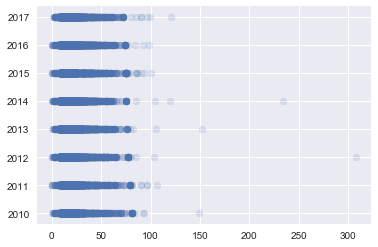

In [120]:
import seaborn as sns
fig, ax = plt.subplots()

ax.scatter(x='Final2_real_dollar_Hourly_wage', y='YEAR',data=data2, alpha=.15);

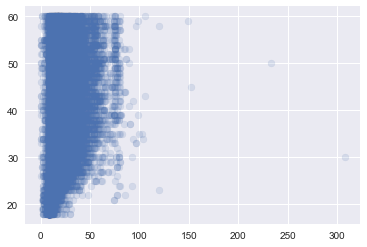

In [121]:
import seaborn as sns
fig, ax = plt.subplots()

ax.scatter(x='Final2_real_dollar_Hourly_wage', y='AGE',data=data2, alpha=.15);

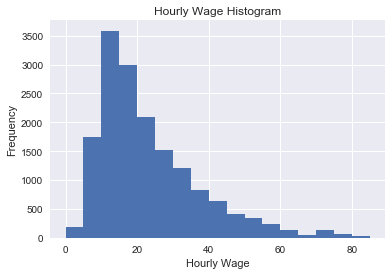

In [122]:
# import plotly.plotly as py
# import plotly.tools as tls

import matplotlib.pyplot as plt
import numpy as np

bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85]
_ = plt.hist(data2['Final2_real_dollar_Hourly_wage'], bins = bins)
_ = plt.title("Hourly Wage Histogram")
_ = plt.xlabel("Hourly Wage")
_ = plt.ylabel("Frequency")
plt.show()

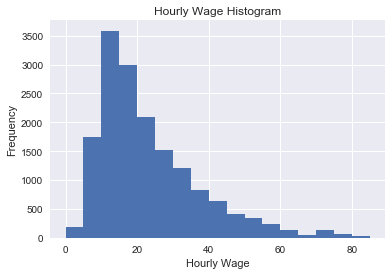

In [123]:
import seaborn as sns
sns.set()
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85]
_ = plt.hist(data2['Final2_real_dollar_Hourly_wage'], bins = bins)
_ = plt.title("Hourly Wage Histogram")
_= plt.xlabel('Hourly Wage')
_= plt.ylabel('Frequency')
plt.show()

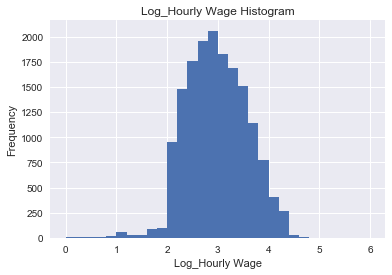

In [124]:
# log_hour_wage
from math import log
import numpy as np
# print(np.log(data2['Final2_real_dollar_Hourly_wage']))
bins = [0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,4,4.2,4.4,4.6,4.8,5,5.2,5.4,5.6,5.8,6]
_ = plt.hist(np.log(data2['Final2_real_dollar_Hourly_wage']), bins = bins)
_ = plt.title("Log_Hourly Wage Histogram")
_= plt.xlabel('Log_Hourly Wage')
_= plt.ylabel('Frequency')
plt.show()

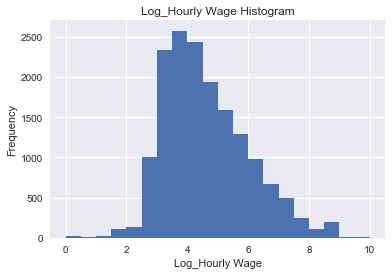

In [125]:
# squrt_hour_wage
import math
import numpy as np
# print(np.log(data2['Final2_real_dollar_Hourly_wage']))
bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]
_ = plt.hist(np.sqrt(data2['Final2_real_dollar_Hourly_wage']),bins= bins)
_ = plt.title("Log_Hourly Wage Histogram")
_= plt.xlabel('Log_Hourly Wage')
_= plt.ylabel('Frequency')
plt.show()

In [126]:
data2['Final2_real_dollar_Hourly_wage'].head(5)

0    10.422417
1    50.940455
2    19.936485
3    33.307111
4    42.586220
Name: Final2_real_dollar_Hourly_wage, dtype: float64

In [127]:
len(data2)

16212

In [128]:
import pandas as pd
pd.set_option('max_rows',500)
pd.set_option('max_columns',500)
data2.head(5)

,YEAR,AGE,SEX,IND,RACE,EDUC,age*female,Final2_real_dollar_Hourly_wage,COUNTY,occ_group,ind_merge,education,race2,age*2,OCC_10.0,OCC_20.0,OCC_40.0,OCC_50.0,OCC_60.0,OCC_100.0,OCC_110.0,OCC_120.0,OCC_135.0,OCC_136.0,OCC_137.0,OCC_140.0,OCC_150.0,OCC_160.0,OCC_205.0,OCC_220.0,OCC_230.0,OCC_300.0,OCC_310.0,OCC_330.0,OCC_340.0,OCC_350.0,OCC_360.0,OCC_410.0,OCC_420.0,OCC_430.0,OCC_500.0,OCC_510.0,OCC_520.0,OCC_530.0,OCC_540.0,OCC_565.0,OCC_600.0,OCC_630.0,OCC_640.0,OCC_650.0,OCC_700.0,OCC_710.0,OCC_725.0,OCC_726.0,OCC_735.0,OCC_740.0,OCC_800.0,OCC_810.0,OCC_820.0,OCC_830.0,OCC_840.0,OCC_850.0,OCC_860.0,OCC_900.0,OCC_910.0,OCC_930.0,OCC_940.0,OCC_950.0,OCC_1006.0,OCC_1007.0,OCC_1010.0,OCC_1020.0,OCC_1030.0,OCC_1050.0,OCC_1060.0,OCC_1105.0,OCC_1106.0,OCC_1107.0,OCC_1200.0,OCC_1220.0,OCC_1240.0,OCC_1300.0,OCC_1310.0,OCC_1320.0,OCC_1350.0,OCC_1360.0,OCC_1400.0,OCC_1410.0,OCC_1420.0,OCC_1430.0,OCC_1440.0,OCC_1450.0,OCC_1460.0,OCC_1530.0,OCC_1540.0,OCC_1550.0,OCC_1560.0,OCC_1610.0,OCC_1640.0,OCC_1650.0,OCC_1700.0,OCC_1710.0,OCC_1720.0,OCC_1740.0,OCC_1760.0,OCC_1800.0,OCC_1820.0,OCC_1840.0,OCC_1860.0,OCC_1900.0,OCC_1910.0,OCC_1920.0,OCC_1930.0,OCC_1965.0,OCC_2000.0,OCC_2010.0,OCC_2015.0,OCC_2016.0,OCC_2025.0,OCC_2040.0,OCC_2050.0,OCC_2060.0,OCC_2100.0,OCC_2105.0,OCC_2145.0,OCC_2160.0,OCC_2200.0,OCC_2300.0,OCC_2310.0,OCC_2320.0,OCC_2330.0,OCC_2340.0,OCC_2400.0,OCC_2430.0,OCC_2440.0,OCC_2540.0,OCC_2550.0,OCC_2600.0,OCC_2630.0,OCC_2700.0,OCC_2710.0,OCC_2720.0,OCC_2740.0,OCC_2750.0,OCC_2760.0,OCC_2800.0,OCC_2810.0,OCC_2825.0,OCC_2830.0,OCC_2840.0,OCC_2850.0,OCC_2860.0,OCC_2900.0,OCC_2910.0,OCC_2920.0,OCC_3000.0,OCC_3010.0,OCC_3030.0,OCC_3050.0,OCC_3060.0,OCC_3110.0,OCC_3150.0,OCC_3160.0,OCC_3200.0,OCC_3210.0,OCC_3220.0,OCC_3230.0,OCC_3245.0,OCC_3250.0,OCC_3255.0,OCC_3256.0,OCC_3258.0,OCC_3260.0,OCC_3300.0,OCC_3310.0,OCC_3320.0,OCC_3400.0,OCC_3420.0,OCC_3500.0,OCC_3510.0,OCC_3520.0,OCC_3535.0,OCC_3540.0,OCC_3600.0,OCC_3610.0,OCC_3620.0,OCC_3630.0,OCC_3640.0,OCC_3645.0,OCC_3646.0,OCC_3647.0,OCC_3648.0,OCC_3649.0,OCC_3655.0,OCC_3700.0,OCC_3710.0,OCC_3720.0,OCC_3730.0,OCC_3740.0,OCC_3750.0,OCC_3800.0,OCC_3820.0,OCC_3840.0,OCC_3850.0,OCC_3910.0,OCC_3930.0,OCC_3940.0,OCC_3945.0,OCC_3955.0,OCC_4000.0,OCC_4010.0,OCC_4020.0,OCC_4030.0,OCC_4040.0,OCC_4050.0,OCC_4060.0,OCC_4110.0,OCC_4120.0,OCC_4130.0,OCC_4140.0,OCC_4150.0,OCC_4200.0,OCC_4210.0,OCC_4220.0,OCC_4230.0,OCC_4240.0,OCC_4250.0,OCC_4300.0,OCC_4320.0,OCC_4350.0,OCC_4400.0,OCC_4420.0,OCC_4430.0,OCC_4465.0,OCC_4500.0,OCC_4510.0,OCC_4520.0,OCC_4530.0,OCC_4540.0,OCC_4600.0,OCC_4610.0,OCC_4620.0,OCC_4640.0,OCC_4650.0,OCC_4700.0,OCC_4710.0,OCC_4720.0,OCC_4740.0,OCC_4750.0,OCC_4760.0,OCC_4800.0,OCC_4810.0,OCC_4820.0,OCC_4830.0,OCC_4840.0,OCC_4850.0,OCC_4900.0,OCC_4920.0,OCC_4930.0,OCC_4940.0,OCC_4950.0,OCC_4965.0,OCC_5000.0,OCC_5020.0,OCC_5030.0,OCC_5100.0,OCC_5110.0,OCC_5120.0,OCC_5130.0,OCC_5140.0,OCC_5150.0,OCC_5160.0,OCC_5165.0,OCC_5200.0,OCC_5220.0,OCC_5230.0,OCC_5240.0,OCC_5250.0,OCC_5260.0,OCC_5300.0,OCC_5310.0,OCC_5320.0,OCC_5330.0,OCC_5340.0,OCC_5350.0,OCC_5360.0,OCC_5400.0,OCC_5410.0,OCC_5420.0,OCC_5500.0,OCC_5510.0,OCC_5520.0,OCC_5540.0,OCC_5550.0,OCC_5560.0,OCC_5600.0,OCC_5610.0,OCC_5620.0,OCC_5630.0,OCC_5700.0,OCC_5800.0,OCC_5810.0,OCC_5820.0,OCC_5840.0,OCC_5850.0,OCC_5860.0,OCC_5900.0,OCC_5910.0,OCC_5920.0,OCC_5940.0,OCC_6005.0,OCC_6010.0,OCC_6040.0,OCC_6050.0,OCC_6200.0,OCC_6210.0,OCC_6220.0,OCC_6230.0,OCC_6240.0,OCC_6250.0,OCC_6260.0,OCC_6300.0,OCC_6320.0,OCC_6330.0,OCC_6355.0,OCC_6360.0,OCC_6400.0,OCC_6420.0,OCC_6440.0,OCC_6460.0,OCC_6515.0,OCC_6520.0,OCC_6530.0,OCC_6600.0,OCC_6660.0,OCC_6700.0,OCC_6710.0,OCC_6720.0,OCC_6730.0,OCC_6740.0,OCC_6765.0,OCC_6820.0,OCC_6940.0,OCC_7000.0,OCC_7010.0,OCC_7020.0,OCC_7040.0,OCC_7100.0,OCC_7110.0,OCC_7120.0,OCC_7130.0,OCC_7140.0,OCC_7150.0,OCC_7160.0,OCC_7200.0,OCC_7210.0,OCC_7220.0,OCC_7240.0,OCC_7260.0,OCC_7300.0,OCC_7315.0,OCC_7320.0,OCC_7330.0,OCC_7340.0,OCC_7350.0,OCC_7360.0,OCC_7410.0,OCC_7420.0,OCC_7430.0,OCC_7510.0,OCC_7610.0,OCC_7630.0,OC

# Run Model

In [131]:
# x = data2[['AGE','SEX_2.0', 'occ_group_1.0',
#        'occ_group_2.0', 'occ_group_3.0', 'occ_group_4.0', 'occ_group_5.0',
#        'occ_group_6.0', 'occ_group_8.0', 'ind_merge_1.0',
#        'ind_merge_2.0', 'ind_merge_3.0', 'ind_merge_4.0', 'ind_merge_5.0',
#        'ind_merge_6.0', 'ind_merge_8.0', 'ind_merge_9.0',
#        'ind_merge_10.0', 'ind_merge_11.0', 'ind_merge_12.0', 
#        'ind_merge_14.0', 'ind_merge_15.0', 'race2_1.0', 
#         'education_1.0', 'education_4.0']]
x = data2.drop(columns = ['YEAR', 'AGE', 'SEX', 'IND', 'RACE', 'EDUC', 'age*female', 'Final2_real_dollar_Hourly_wage', 
                 'COUNTY', 'occ_group', 'ind_merge', 'age*2', 'education', 'race2'])
# y = np.log(data2['Final2_real_dollar_Hourly_wage'])
y = data2['Final2_real_dollar_Hourly_wage']

In [132]:
x.head(5)

,OCC_10.0,OCC_20.0,OCC_40.0,OCC_50.0,OCC_60.0,OCC_100.0,OCC_110.0,OCC_120.0,OCC_135.0,OCC_136.0,OCC_137.0,OCC_140.0,OCC_150.0,OCC_160.0,OCC_205.0,OCC_220.0,OCC_230.0,OCC_300.0,OCC_310.0,OCC_330.0,OCC_340.0,OCC_350.0,OCC_360.0,OCC_410.0,OCC_420.0,OCC_430.0,OCC_500.0,OCC_510.0,OCC_520.0,OCC_530.0,OCC_540.0,OCC_565.0,OCC_600.0,OCC_630.0,OCC_640.0,OCC_650.0,OCC_700.0,OCC_710.0,OCC_725.0,OCC_726.0,OCC_735.0,OCC_740.0,OCC_800.0,OCC_810.0,OCC_820.0,OCC_830.0,OCC_840.0,OCC_850.0,OCC_860.0,OCC_900.0,OCC_910.0,OCC_930.0,OCC_940.0,OCC_950.0,OCC_1006.0,OCC_1007.0,OCC_1010.0,OCC_1020.0,OCC_1030.0,OCC_1050.0,OCC_1060.0,OCC_1105.0,OCC_1106.0,OCC_1107.0,OCC_1200.0,OCC_1220.0,OCC_1240.0,OCC_1300.0,OCC_1310.0,OCC_1320.0,OCC_1350.0,OCC_1360.0,OCC_1400.0,OCC_1410.0,OCC_1420.0,OCC_1430.0,OCC_1440.0,OCC_1450.0,OCC_1460.0,OCC_1530.0,OCC_1540.0,OCC_1550.0,OCC_1560.0,OCC_1610.0,OCC_1640.0,OCC_1650.0,OCC_1700.0,OCC_1710.0,OCC_1720.0,OCC_1740.0,OCC_1760.0,OCC_1800.0,OCC_1820.0,OCC_1840.0,OCC_1860.0,OCC_1900.0,OCC_1910.0,OCC_1920.0,OCC_1930.0,OCC_1965.0,OCC_2000.0,OCC_2010.0,OCC_2015.0,OCC_2016.0,OCC_2025.0,OCC_2040.0,OCC_2050.0,OCC_2060.0,OCC_2100.0,OCC_2105.0,OCC_2145.0,OCC_2160.0,OCC_2200.0,OCC_2300.0,OCC_2310.0,OCC_2320.0,OCC_2330.0,OCC_2340.0,OCC_2400.0,OCC_2430.0,OCC_2440.0,OCC_2540.0,OCC_2550.0,OCC_2600.0,OCC_2630.0,OCC_2700.0,OCC_2710.0,OCC_2720.0,OCC_2740.0,OCC_2750.0,OCC_2760.0,OCC_2800.0,OCC_2810.0,OCC_2825.0,OCC_2830.0,OCC_2840.0,OCC_2850.0,OCC_2860.0,OCC_2900.0,OCC_2910.0,OCC_2920.0,OCC_3000.0,OCC_3010.0,OCC_3030.0,OCC_3050.0,OCC_3060.0,OCC_3110.0,OCC_3150.0,OCC_3160.0,OCC_3200.0,OCC_3210.0,OCC_3220.0,OCC_3230.0,OCC_3245.0,OCC_3250.0,OCC_3255.0,OCC_3256.0,OCC_3258.0,OCC_3260.0,OCC_3300.0,OCC_3310.0,OCC_3320.0,OCC_3400.0,OCC_3420.0,OCC_3500.0,OCC_3510.0,OCC_3520.0,OCC_3535.0,OCC_3540.0,OCC_3600.0,OCC_3610.0,OCC_3620.0,OCC_3630.0,OCC_3640.0,OCC_3645.0,OCC_3646.0,OCC_3647.0,OCC_3648.0,OCC_3649.0,OCC_3655.0,OCC_3700.0,OCC_3710.0,OCC_3720.0,OCC_3730.0,OCC_3740.0,OCC_3750.0,OCC_3800.0,OCC_3820.0,OCC_3840.0,OCC_3850.0,OCC_3910.0,OCC_3930.0,OCC_3940.0,OCC_3945.0,OCC_3955.0,OCC_4000.0,OCC_4010.0,OCC_4020.0,OCC_4030.0,OCC_4040.0,OCC_4050.0,OCC_4060.0,OCC_4110.0,OCC_4120.0,OCC_4130.0,OCC_4140.0,OCC_4150.0,OCC_4200.0,OCC_4210.0,OCC_4220.0,OCC_4230.0,OCC_4240.0,OCC_4250.0,OCC_4300.0,OCC_4320.0,OCC_4350.0,OCC_4400.0,OCC_4420.0,OCC_4430.0,OCC_4465.0,OCC_4500.0,OCC_4510.0,OCC_4520.0,OCC_4530.0,OCC_4540.0,OCC_4600.0,OCC_4610.0,OCC_4620.0,OCC_4640.0,OCC_4650.0,OCC_4700.0,OCC_4710.0,OCC_4720.0,OCC_4740.0,OCC_4750.0,OCC_4760.0,OCC_4800.0,OCC_4810.0,OCC_4820.0,OCC_4830.0,OCC_4840.0,OCC_4850.0,OCC_4900.0,OCC_4920.0,OCC_4930.0,OCC_4940.0,OCC_4950.0,OCC_4965.0,OCC_5000.0,OCC_5020.0,OCC_5030.0,OCC_5100.0,OCC_5110.0,OCC_5120.0,OCC_5130.0,OCC_5140.0,OCC_5150.0,OCC_5160.0,OCC_5165.0,OCC_5200.0,OCC_5220.0,OCC_5230.0,OCC_5240.0,OCC_5250.0,OCC_5260.0,OCC_5300.0,OCC_5310.0,OCC_5320.0,OCC_5330.0,OCC_5340.0,OCC_5350.0,OCC_5360.0,OCC_5400.0,OCC_5410.0,OCC_5420.0,OCC_5500.0,OCC_5510.0,OCC_5520.0,OCC_5540.0,OCC_5550.0,OCC_5560.0,OCC_5600.0,OCC_5610.0,OCC_5620.0,OCC_5630.0,OCC_5700.0,OCC_5800.0,OCC_5810.0,OCC_5820.0,OCC_5840.0,OCC_5850.0,OCC_5860.0,OCC_5900.0,OCC_5910.0,OCC_5920.0,OCC_5940.0,OCC_6005.0,OCC_6010.0,OCC_6040.0,OCC_6050.0,OCC_6200.0,OCC_6210.0,OCC_6220.0,OCC_6230.0,OCC_6240.0,OCC_6250.0,OCC_6260.0,OCC_6300.0,OCC_6320.0,OCC_6330.0,OCC_6355.0,OCC_6360.0,OCC_6400.0,OCC_6420.0,OCC_6440.0,OCC_6460.0,OCC_6515.0,OCC_6520.0,OCC_6530.0,OCC_6600.0,OCC_6660.0,OCC_6700.0,OCC_6710.0,OCC_6720.0,OCC_6730.0,OCC_6740.0,OCC_6765.0,OCC_6820.0,OCC_6940.0,OCC_7000.0,OCC_7010.0,OCC_7020.0,OCC_7040.0,OCC_7100.0,OCC_7110.0,OCC_7120.0,OCC_7130.0,OCC_7140.0,OCC_7150.0,OCC_7160.0,OCC_7200.0,OCC_7210.0,OCC_7220.0,OCC_7240.0,OCC_7260.0,OCC_7300.0,OCC_7315.0,OCC_7320.0,OCC_7330.0,OCC_7340.0,OCC_7350.0,OCC_7360.0,OCC_7410.0,OCC_7420.0,OCC_7430.0,OCC_7510.0,OCC_7610.0,OCC_7630.0,OCC_7700.0,OCC_7710.0,OCC_7720.0,OCC_7730.0,OCC_7740.0,OCC_7750.0,OCC_7800.0,OCC_7810.0,OCC_7830.0,OCC_7840.0,OCC_7850.0

In [133]:

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.1, random_state = 1)


In [147]:
linearR = LinearRegression()
aa = linearR.fit(x_train, y_train)

In [148]:
y_pre = linearR.predict(x_test)

In [173]:
y_pre1 = pd.DataFrame(y_pre)
y_pre1

,0
0,1.535938e+01
1,3.004688e+01
2,1.521875e+01
3,1.956250e+01
4,3.614062e+01
5,3.679688e+01
6,1.360938e+01
7,1.503125e+01
8,1.809375e+01
9,1.109375e+01


In [166]:
from scipy import stats
import statsmodels.api as sm
aa = sm.OLS(y_train, x_train)
aa2 = aa.fit()
aa2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Final2_real_dollar_Hourly_wage   R-squared:                       0.345
Model:                                        OLS   Adj. R-squared:                  0.325
Method:                             Least Squares   F-statistic:                     17.26
Date:                            Mon, 12 Nov 2018   Prob (F-statistic):               0.00
Time:                                    15:54:27   Log-Likelihood:                -56893.
No. Observations:                           14590   AIC:                         1.147e+05
Df Residuals:                               14157   BIC:                         1.179e+05
Df Model:                                     432                                         
Covariance Type:                        nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
OCC_10.0      43.1590      0.956     45.152      0.000      41.285      45.033
OCC_20.0      31.7530      1.048     30.306      0.000      29.699      33.807
OCC_40.0      30.9411      4.288      7.216      0.000      22.536      39.346
OCC_50.0      40.5455      1.072     37.822      0.000      38.444      42.647
OCC_60.0      33.0659      4.584      7.213      0.000      24.080      42.051
OCC_100.0     28.1207      3.032      9.274      0.000      22.177      34.064
OCC_110.0     40.7347      1.391     29.279      0.000      38.008      43.462
OCC_120.0     34.1422      1.025     33.308      0.000      32.133      36.151
OCC_135.0     10.3907      8.576      1.212      0.226      -6.420      27.201
OCC_136.0     35.8978      2.334     15.379      0.000      31.323      40.473
OCC_137.0     28.3634      8.576      3.307      0.001      11.553      45.174
OCC_140.0     32.9312      2.178     15.117      0.000      28.661      37.201
OCC_150.0     31.2157      2.334     13.374      0.000      26.640      35.791
OCC_160.0     29.0452      2.111     13.757      0.000      24.907      33.184
OCC_205.0     13.1667      3.501      3.761      0.000       6.304      20.029
OCC_220.0     32.2181      1.635     19.700      0.000      29.012      35.424
OCC_230.0     33.1828      1.238     26.807      0.000      30.756      35.609
OCC_300.0     52.4314      3.032     17.292      0.000      46.488      58.375
OCC_310.0     20.8446      1.207     17.272      0.000      18.479      23.210
OCC_330.0     19.5524      7.002      2.792      0.005       5.827      33.278
OCC_340.0     23.0709      4.288      5.380      0.000      14.666      31.476
OCC_350.0     29.9311      1.493     20.049      0.000      27.005      32.857
OCC_360.0     34.7465      4.951      7.017      0.000      25.041      44.452
OCC_410.0     25.3847      2.586      9.817      0.000      20.316      30.453
OCC_420.0     25.8770      1.871     13.827      0.000      22.209      29.545
OCC_430.0     35.4196      0.637     55.640      0.000      34.172      36.667
OCC_500.0     15.4095     12.129      1.271      0.204      -8.364      39.183
OCC_510.0      9.3433     12.129      0.770      0.441     -14.430      33.117
OCC_520.0     24.1389      2.292     10.531      0.000      19.646      28.632
OCC_530.0     27.4094      1.918     14.293      0.000      23.651      31.168
OCC_540.0     26.7403      1.682     15.899      0.000      23.443      30.037
OCC_565.0     34.0966      1.769     19.273      0.000      30.629      37.564
OCC_600.0     25.2857      2.712      9.324      0.000      19.970      30.602
OCC_630.0     24.8043      1.429     17.353      0.000      22.003      27.606
OCC_640.0     27.9794      3

In [170]:
# y_pre = sm.OLS(x_test).fit()

In [150]:
len(y_pre1)

1622

In [151]:
y_test

8392      10.545380
12461     59.946575
9546       7.645401
11418      7.786095
13176     49.955349
10262     39.916714
13179     12.468900
13556     12.812500
2141      16.105663
16003     12.000000
9520      14.795168
15374     62.500000
4173      22.413800
5229      14.901297
6895      23.569832
882       28.751299
3315      27.272727
1463      50.702187
15030     22.000000
941       20.602955
6876      10.285018
6113      20.344741
15052     16.826750
231       13.448280
9809      14.499897
7922      22.766315
11643      7.526559
16109     19.250000
15572      9.000000
12414     27.015950
5206      23.156616
14427      9.225000
7899      13.874060
2730      35.839032
5658      14.335048
1927      13.347591
286       13.173825
8696      36.503097
7821      18.027440
2751      42.238932
13296     36.900000
10277     44.899814
16061     35.000000
3191      17.250000
5260      14.335048
1955      27.860064
1655      13.905891
10141     37.435545
15752     18.360000
6890      10.713560


In [152]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pre1)

2.4403606056299423e+26

In [153]:
# RMSE
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pre1)))
# 0.5949006946191527

15621653579662.885


In [157]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pre1)  

-9.288619055784373e+23

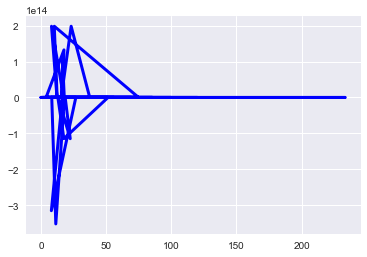

In [172]:
# plt.scatter(x_test, y_test,  color='black')
plt.plot(y_test, y_pre, color='blue', linewidth=3)

# Lasso Regression


In [103]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pre = lasso.predict(x_test)

In [104]:
y_pre

array([27.53300711, 36.95391426, 19.19547557, ..., 13.82999821,
       28.11196613, 22.42611816])

In [105]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pre)))

12.48395588269517


In [106]:
y_pre

array([27.53300711, 36.95391426, 19.19547557, ..., 13.82999821,
       28.11196613, 22.42611816])

# Random Forest 

In [107]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(x_train, y_train)
print(regr.predict(x_test))

[31.04776538 31.04776538 20.7819796  ... 13.55749828 31.04776538
 20.7819796 ]


In [108]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pre)))

12.48395588269517


In [220]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train)
y_pre = clf.predict(x_test)

In [221]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pre)))

12.925442080170262
